In [ ]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from torchvision.utils import make_grid
import numpy as np

In [2]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [3]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.n_features = 36
        self.n_out = 36
        self.model = nn.Sequential(
            nn.Linear(self.n_features, 256),
            nn.LeakyReLU(0.01),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.01),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.01),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.01),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.01),
            nn.Linear(256, self.n_out),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

def row(n, n_features=1, device='cpu'):
    random0 = np.random.rand(n, 1) * 2 * np.pi
    forarray = np.arange(n_features)
    forones = np.ones((n, n_features))
    forrandarray = forarray * forones
    randarray = random0 * forrandarray 
    random1 = np.random.rand(n, 1) * 2 * np.pi
    output2 = random1 + randarray
    output3 = np.cos(output2) * 0.5 + 0.5
    return torch.from_numpy(output3.astype(np.float32)).to(device)

In [ ]:
# Create an instance of the generator model and load parameters
generator = Generator().to(device)
generator.load_state_dict(torch.load('LearnedPRNG_NIST_passed.pth', map_location=device))
generator.eval()

In [12]:
# Generate noise
num_images = 64
n_features = 36
noise_input = row(num_images, n_features, device=device)
generated_images = generator(noise_input).cpu().detach()

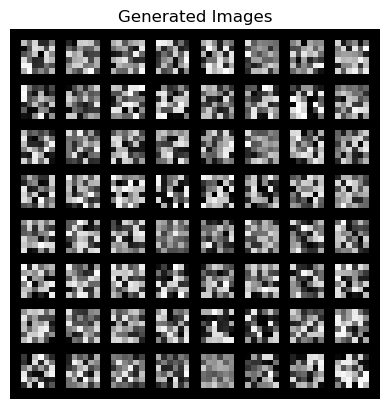

In [13]:
# Plot image
grid_img = make_grid(generated_images.view(-1, 1, 6, 6), nrow=8, normalize=True)
plt.imshow(grid_img.permute(1, 2, 0).numpy(), cmap='gray')
plt.title('Generated Images')
plt.axis('off')
plt.show()

In [15]:
# Generates enough random numbers for NIST testing
num_images = 64
n_features = 36
noise_input = row(num_images, n_features, device=device)
with open('output_10.txt', 'a') as output:
    for num in range(80000):
        rand_img = generator(noise_input).cpu().detach().numpy().copy().flatten() 
        np.savetxt(output,rand_img)

In [17]:
#Code to convert a random number in decimal to a random number in binary
from ctypes import *
class POINT(Union):
    _fields_ = [("x", c_float), ("y", c_uint)]
       
read_data = open('output_10.txt', 'r')
write_data = open('output_2.txt', 'w')

for line in read_data:

    point = POINT(float(line))
    write_data.write(bin(point.y)[13:20])


read_data.close()
write_data.close()